# 04 - EDA Text data


### Global definitions

In [10]:
# libraries
import pandas as pd
import os
import json
import re
import plotly.express as px
import plotly.graph_objects as go
from nltk.tokenize import sent_tokenize, word_tokenize

In [11]:
%run -i 00functions.py

In [12]:
# Global definitions
directory_path = os.getcwd()

### Reading data

In [13]:
# weatwaves
news_path = directory_path + "/dat/02_newsContentProprocess.xlsx"
news_data = pd.read_excel(news_path)
news_data

,Unnamed: 0.1,Unnamed: 0,link,title,text,keywords,summary,text1,summary1,title1
0,0,0,https://www.cbc.ca/news/science/naming-heat-wa...,International project to name heat waves met w...,"As climate change makes heat waves worse, an i...","['waves', 'heat', 'skepticism', 'wave', 'think...","As climate change makes heat waves worse, an i...",climate change make heat wave bad internationa...,climate change make heat wave bad internationa...,international project heat wave meet skepticis...
1,1,0,https://www.dw.com/en/germany-battles-heat-wav...,Germany battles heat waves with drinking water...,At the drinking fountain outside Berlin's busy...,"['tap', 'waves', 'heat', 'water', 'fountains',...","""It can only be a good thing to have more drin...",drinking fountain outside berlin busy gesundbr...,good thing drinking fountain heat unbearable h...,germany battle heat wave drink water fountain
2,2,0,https://www.foxweather.com/weather-news/heat-w...,Streaking in the 90s: Cities across US set rec...,An extended heat wave gripping the Northeast o...,"['waves', 'heat', 'records', 'streaking', 'day...",An extended heat wave gripping the Northeast o...,extended heat wave grip northeast past day set...,extended heat wave grip northeast past day set...,streak city set record heat wave degree
3,3,0,https://www.usatoday.com/story/news/nation/202...,Weather forecast: Heat waves may now get names...,"This summer, Seville, a city in southwestern S...","['waves', 'heat', 'olalla', 'wave', 'forecast'...","This summer, Seville, a city in southwestern S...",summer seville city southwestern spain experie...,summer seville city southwestern spain experie...,weather forecast heat wave name zoe spain
4,4,0,https://www.grid.news/story/climate/2022/08/09...,Extreme heat waves show the ultimate climate i...,The road to an unlivable climate isn’t exactly...,"['waves', 'heat', 'thought', 'wetbulb', 'unwor...",The road to an unlivable climate isn’t exactly...,road unlivable climate isn exactly scenic rout...,road unlivable climate isn exactly scenic rout...,extreme heat wave ultimate climate impact arri...
...,...,...,...,...,...,...,...,...,...,...
451,456,0,https://www.dw.com/en/climate-crisis-heat-baby...,Indian heatwaves threaten maternal and baby he...,The heatwave that swept across South Asia in A...,"['baby', 'heat', 'health', 'india', 'indian', ...",With climate change exacerbating extreme heat ...,heatwave sweep south asia april come bad time ...,climate change exacerbate extreme heat part wo...,indian heatwave threaten maternal baby health
452,457,0,https://www.gov.uk/government/publications/hea...,Looking after children and those in early year...,Children’s susceptibility to high temperatures...,"['high', 'heat', 'water', 'temperature', 'scho...",Children’s susceptibility to high temperatures...,child susceptibility high temperature vary yea...,child susceptibility high temperature vary yea...,look child early year setting heatwave teacher...
453,458,0,https://www.ft.com/content/48f20f75-92aa-40d5-...,Subscribe to read,Pay based on use\n\nGet Started\n\nPurchase a ...,"['enterprise', 'ends', 'subscribe', 'startedpu...",Pay based on useGet StartedPurchase a Team or ...,pay base use start purchase team enterprise su...,pay base useget startedpurchase team enterpris...,subscribe read
454,459,0,https://theconversation.com/a-climate-scientis...,A climate scientist on India and Pakistan’s ho...,The record-shattering heatwave that engulfed m...,"['pollution', 'better', 'india', 'quality', 'a...",This is particularly dire for India and Pakist...,record shatter heatwave engulf india pakistan ...,particularly dire india pakistan step improve ...,climate scientist india pakistan horror heatwa...


## Exploratory data analysis

### Text

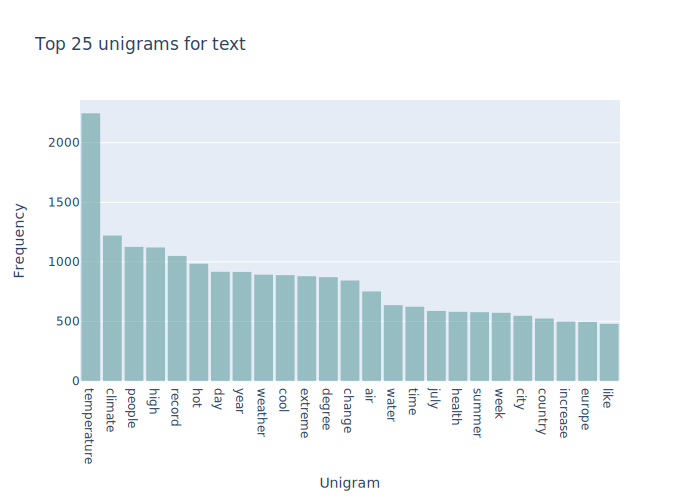

In [14]:
common_words = get_top_n_words(news_data['text1'], 25, 1)
df = pd.DataFrame(common_words, columns = ['word' , 'count'])
df.groupby('word').sum()['count'].sort_values(ascending=False)
fig = px.bar(df, x="word", y="count",
            title="Top 25 unigrams for text",
             labels={
                     "count": "Frequency",
                     'word': "Unigram"
                 })
# Customize aspect
fig.update_traces(marker_color='cadetblue', marker_line_color='cadetblue',
                  marker_line_width=1.5, opacity=0.6)
#fig.show()
fig.show(renderer="svg")


## Due to the fact that it is not possible to see the rendered graphic in github, the static version wa included.

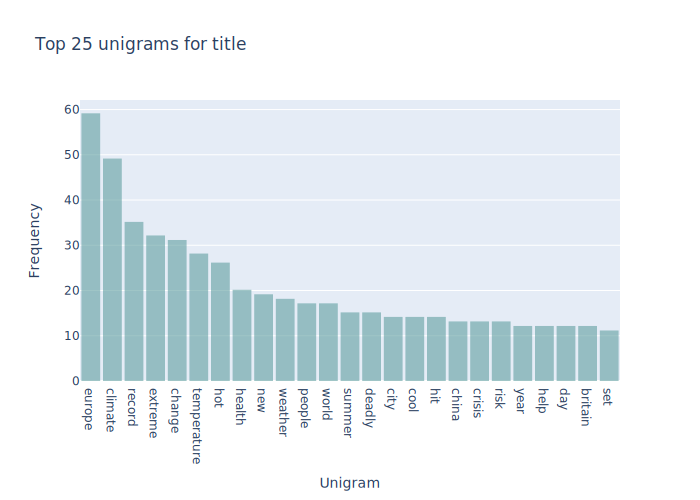

In [15]:
common_words = get_top_n_words(news_data['title1'], 25, 1)
df = pd.DataFrame(common_words, columns = ['word' , 'count'])
df.groupby('word').sum()['count'].sort_values(ascending=False)
fig = px.bar(df, x="word", y="count",
            title="Top 25 unigrams for title",
             labels={
                     "count": "Frequency",
                     'word': "Unigram"
                 })
# Customize aspect
fig.update_traces(marker_color='cadetblue', marker_line_color='cadetblue',
                  marker_line_width=1.5, opacity=0.6)
#fig.show()
fig.show(renderer="svg")

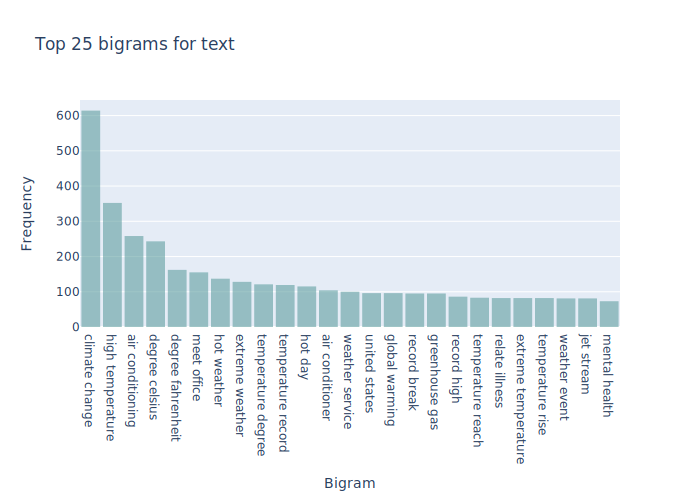

In [16]:
common_words = get_top_n_words(news_data['text1'], 25, 2)
df = pd.DataFrame(common_words, columns = ['word' , 'count'])
df.groupby('word').sum()['count'].sort_values(ascending=False)
fig = px.bar(df, x="word", y="count",
            title="Top 25 bigrams for text",
             labels={
                     "count": "Frequency",
                     'word': "Bigram"
                 })
# Customize aspect
fig.update_traces(marker_color='cadetblue', marker_line_color='cadetblue',
                  marker_line_width=1.5, opacity=0.6)
#fig.show()
fig.show(renderer="svg")

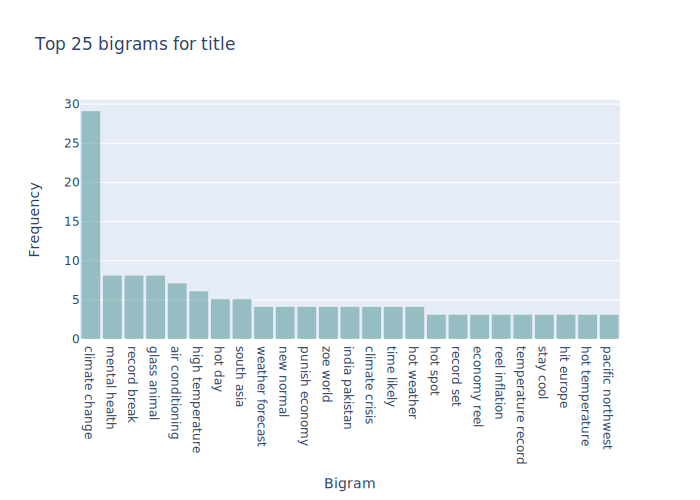

In [17]:
common_words = get_top_n_words(news_data['title1'], 25, 2)
df = pd.DataFrame(common_words, columns = ['word' , 'count'])
df.groupby('word').sum()['count'].sort_values(ascending=False)
fig = px.bar(df, x="word", y="count",
            title="Top 25 bigrams for title",
             labels={
                     "count": "Frequency",
                     'word': "Bigram"
                 })
# Customize aspect
fig.update_traces(marker_color='cadetblue', marker_line_color='cadetblue',
                  marker_line_width=1.5, opacity=0.6)
#fig.show()
fig.show(renderer="svg")

In [18]:
news_data.to_excel(directory_path + "/dat/03_newsContentProprocess.xlsx")